# Detecting blobs at one scale

In [1]:
import os
import sys
import cv2
import skimage.io
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.abspath(''), '..', '..'))
import toolbox
import imp
imp.reload(toolbox)

<module 'toolbox' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week2/../../toolbox/__init__.py'>

/var/folders/bb/6zx8vn690fd_kml8spjg6j8h0000gn/T/ipykernel_18383/1672894118.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_blob_img = skimage.io.imread(os.path.join('data', 'test_blob_uniform.png')).astype(np.float)


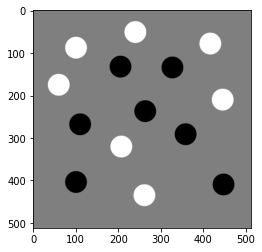

In [2]:
test_blob_img = skimage.io.imread(os.path.join('data', 'test_blob_uniform.png')).astype(np.float)
plt.imshow(test_blob_img, cmap='gray')

### Scale-space Laplacian

In [3]:
sigma = np.sqrt(15)
size = 3*sigma
L_img = toolbox.blob.laplacian_image(test_blob_img, sigma, size)

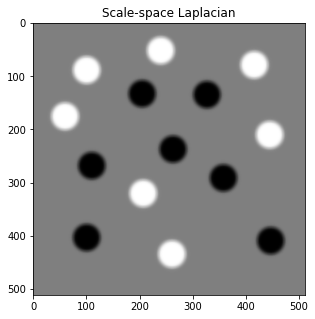

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_title('Scale-space Laplacian')
ax.imshow(L_img, cmap='gray')
plt.show()

In [5]:
coords = toolbox.blob.scale_space_laplacian_detection(L_img, threshold=50)
coords.shape

(7, 2)

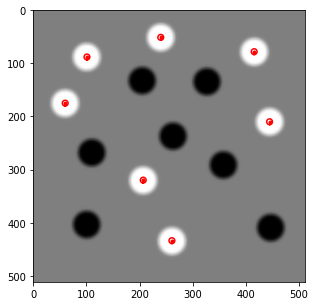

In [6]:
theta = np.arange(0, 2*np.pi, step=np.pi/100)
theta = np.append(theta, 0)
circ = np.array((np.cos(theta),np.sin(theta)))
n = coords.shape[0]
m = circ.shape[1]

fig, ax = plt.subplots(1,1,figsize=(5,5),sharex=True,sharey=True)
ax.imshow(L_img, cmap='gray')
plt.plot(coords[:,1], coords[:,0], '.r')
circ_y = np.sqrt(2*sigma**2)*np.reshape(circ[0,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coords[:,0],(-1,1)).T
circ_x = np.sqrt(2*sigma**2)*np.reshape(circ[1,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coords[:,1],(-1,1)).T
plt.plot(circ_x, circ_y, 'r')
plt.show()

100%|██████████| 100/100 [00:01<00:00, 57.14it/s]


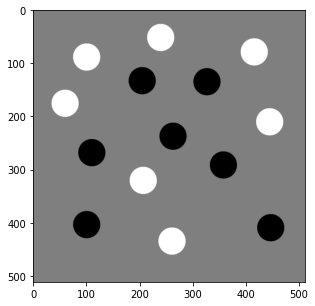

In [17]:
t = 15
g = toolbox.kernel.gaussian_1d(np.sqrt(t))
ddg = toolbox.kernel.ddgaussian_1d(np.sqrt(t))

r,c = test_blob_img.shape
n = 100
L_blob_vol = np.zeros((r,c,n))
tStep = np.zeros(n)

Lg = test_blob_img
for i in tqdm(range(0,n)):
    tStep[i] = t*i
    L_blob_vol[:,:,i] = i*toolbox.blob.laplacian_image(Lg,np.sqrt(t), kernel_size=5)
    Lg = cv2.filter2D(cv2.filter2D(Lg, -1, g), -1, g.T)


#%% find maxima in scale-space
thres = 40.0
coords = toolbox.blob.scale_space_laplacian_detection(L_blob_vol, thres)

# Show circles
theta = np.arange(0, 2*np.pi, step=np.pi/100)
theta = np.append(theta, 0)
circ = np.array((np.cos(theta),np.sin(theta)))
n = coords.shape[0]
m = circ.shape[1]

fig, ax = plt.subplots(1,1,figsize=(5,5),sharex=True,sharey=True)
ax.imshow(test_blob_img, cmap='gray')
plt.plot(coords[:,1], coords[:,0], '.r')
scale = tStep[coords[:,2]]
circ_y = np.sqrt(2*scale)*np.reshape(circ[0,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coords[:,0],(-1,1)).T
circ_x = np.sqrt(2*scale)*np.reshape(circ[1,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coords[:,1],(-1,1)).T
plt.plot(circ_x, circ_y, 'r')
plt.show()